<a href="https://colab.research.google.com/github/Hongyongmin/Edwith-Pytorch/blob/main/9_2_Weight_initialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

mnist_nn_xavier

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random
import matplotlib.pyplot as plt


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [ ]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [ ]:
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform = transforms.ToTensor(),
                          download = True)
mnist_test = dsets.MNIST(root= 'MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:

# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [ ]:
linear1 = torch.nn.Linear(784, 256, bias = True)
linear2 = torch.nn.Linear(256,256,bias = True)
linear3 = torch.nn.Linear(256,10, bias = True)
relu = torch.nn.ReLU()

In [ ]:
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)

Parameter containing:
tensor([[-0.0215, -0.0894,  0.0598,  ...,  0.0200,  0.0203,  0.1212],
        [ 0.0078,  0.1378,  0.0920,  ...,  0.0975,  0.1458, -0.0302],
        [ 0.1270, -0.1296,  0.1049,  ...,  0.0124,  0.1173, -0.0901],
        ...,
        [ 0.0661, -0.1025,  0.1437,  ...,  0.0784,  0.0977, -0.0396],
        [ 0.0430, -0.1274, -0.0134,  ..., -0.0582,  0.1201,  0.1479],
        [-0.1433,  0.0200, -0.0568,  ...,  0.0787,  0.0428, -0.0036]],
       requires_grad=True)

In [ ]:
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3).to(device)

In [ ]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
  avg_cost = 0

  for X,Y in data_loader:
    X=X.view(-1, 28*28).to(device)
    Y=Y.to(device)

    optimizer.zero_grad()
    hypothesis = model(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()
    
    avg_cost += cost / total_batch
  print( ' Epoch : ', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
print('Learning finished')

 Epoch :  0001 cost = 0.248581886
 Epoch :  0002 cost = 0.094884083
 Epoch :  0003 cost = 0.061407920
 Epoch :  0004 cost = 0.043066770
 Epoch :  0005 cost = 0.033178926
 Epoch :  0006 cost = 0.025484348
 Epoch :  0007 cost = 0.021271704
 Epoch :  0008 cost = 0.017561613
 Epoch :  0009 cost = 0.016889174
 Epoch :  0010 cost = 0.015232894
 Epoch :  0011 cost = 0.011401163
 Epoch :  0012 cost = 0.013460129
 Epoch :  0013 cost = 0.009968743
 Epoch :  0014 cost = 0.008436578
 Epoch :  0015 cost = 0.010291980
Learning finished


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy:  0.9787999987602234
Label:  7
Prediction:  7


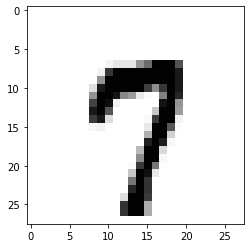

In [ ]:
with torch.no_grad():
  X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = model(X_test)
  correct_prediction = torch.argmax(prediction,1) == Y_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy: ', accuracy.item())

  r = random.randint(0, len(mnist_test)-1)
  X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
  Y_single_data = mnist_test.test_labels[r:r+1].to(device)

  print('Label: ', Y_single_data.item())
  single_prediction = model(X_single_data)
  print('Prediction: ', torch.argmax(single_prediction, 1).item())

  plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap='Greys', interpolation = 'nearest')
  plt.show()

이걸 좀더 deep하게 만들면

In [ ]:
linear1 = torch.nn.Linear(784, 512, bias=True)
linear2 = torch.nn.Linear(512, 512, bias=True)
linear3 = torch.nn.Linear(512, 512, bias=True)
linear4 = torch.nn.Linear(512, 512, bias=True)
linear5 = torch.nn.Linear(512, 10, bias=True)
relu = torch.nn.ReLU()

In [ ]:
torch.nn.init.xavier_uniform_(linear1.weight)
torch.nn.init.xavier_uniform_(linear2.weight)
torch.nn.init.xavier_uniform_(linear3.weight)
torch.nn.init.xavier_uniform_(linear4.weight)
torch.nn.init.xavier_uniform_(linear5.weight)

Parameter containing:
tensor([[ 0.0671,  0.0864, -0.0598,  ...,  0.0525, -0.0161,  0.0830],
        [ 0.0685,  0.0602, -0.0781,  ..., -0.0640,  0.0386,  0.0682],
        [-0.0886, -0.0392,  0.0046,  ..., -0.0030, -0.1035,  0.0250],
        ...,
        [-0.0381, -0.0079, -0.0296,  ...,  0.0459, -0.0676, -0.0100],
        [ 0.0094,  0.1003,  0.0474,  ...,  0.0119,  0.0217,  0.0095],
        [-0.0737, -0.0999, -0.0732,  ..., -0.0068, -0.0954,  0.0919]],
       requires_grad=True)

In [ ]:
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3).to(device)

In [ ]:
criterion = torch.nn.CrossEntropyLoss().to(device)  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.282523513
Epoch: 0002 cost = 0.088219166
Epoch: 0003 cost = 0.057179905
Epoch: 0004 cost = 0.039499808
Epoch: 0005 cost = 0.031499673
Epoch: 0006 cost = 0.024861351
Epoch: 0007 cost = 0.019635614
Epoch: 0008 cost = 0.021247188
Epoch: 0009 cost = 0.014394772
Epoch: 0010 cost = 0.016578743
Epoch: 0011 cost = 0.014872390
Epoch: 0012 cost = 0.008574817
Epoch: 0013 cost = 0.011294536
Epoch: 0014 cost = 0.012687576
Epoch: 0015 cost = 0.008004050
Learning finished


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.9775999784469604
Label:  9
Prediction:  9


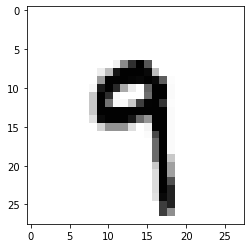

In [ ]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap='Greys', interpolation = 'nearest')
    plt.show()